In [2]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
data_saud = pd.read_csv('./data/2020-12-02-limpezaConcat.csv')
data_saud.head(10)

DT_NOTIFIC                          ID_UNIDADE CS_SEXO  NU_IDADE_N  \
0  2019-01-02            HOSPITAL BOSQUE DA SAUDE       F          27   
1  2019-01-02                     HOSP 9 DE JULHO       F           1   
2  2019-01-02            BP HOSPITAL FILANTROPICO       F          59   
3  2019-01-02  HOSPITAL ISRAELITA ALBERT EINSTEIN       F           1   
4  2019-01-02  HOSPITAL ISRAELITA ALBERT EINSTEIN       M           1   
5  2019-01-03             HOSPITAL SANTA CATARINA       F          53   
6  2019-01-03          HOSPITAL LEFORTE LIBERDADE       M          10   
7  2019-01-03            HOSPITAL NIPO BRASILEIRO       F          45   
8  2019-01-03          HOSPITAL LEFORTE LIBERDADE       F           1   
9  2019-01-04            HOSPITAL INFANTIL SABARA       M           1   

   CS_RACA ID_RG_RESI  SURTO_SG  NOSOCOMIAL  FEBRE  TOSSE  ...  ANTIVIRAL  \
0      1.0        NaN       NaN         NaN    1.0    0.0  ...        1.0   
1      1.0        NaN       0.0         0.0    1.0    1.0  ...        1.0   
2      1.0        NaN       0.0         0.0    1.0    1.0  ...        1.0   
3      9.0        NaN       0.0         0.0    1.0    1.0  ...        0.0   
4      1.0        NaN       0.0         0.0    1.0    1.0  ...        0.0   
5      9.0        NaN       0.0         0.0    1.0    1.0  ...        0.0   
6      1.0        NaN       0.0         0.0    1.0    1.0  ...        0.0   
7      9.0        NaN       0.0         0.0    0.0    1.0  ...        1.0   
8      1.0        NaN       0.0         0.0    1.0    1.0  ...        0.0   
9      1.0        NaN       0.0         0.0    1.0    1.0  ...        1.0   

   HOSPITAL  ID_RG_INTE  UTI  RAIOX_RES  RAIOX_OUT  CLASSI_FIN  CLASSI_OUT  \
0       1.0         NaN  1.0        3.0        NaN         4.0         NaN   
1       1.0         NaN  1.0        4.0        NaN         2.0         NaN   
2       1.0         NaN  0.0        NaN        NaN         1.0         NaN   
3       1.0         NaN  1.0        3.0        NaN         2.0         NaN   
4       1.0         NaN  0.0        1.0        NaN         2.0         NaN   
5       1.0         NaN  1.0        4.0        NaN         4.0         NaN   
6       1.0         NaN  1.0        9.0        NaN         4.0         NaN   
7       1.0         NaN  0.0        2.0        NaN         4.0         NaN   
8       1.0         NaN  1.0        2.0        NaN         2.0         NaN   
9       1.0         NaN  1.0        1.0        NaN         2.0         NaN   

   CRITERIO  EVOLUCAO  
0       1.0     OBITO  
1       1.0       NaN  
2       1.0      CURA  
3       1.0      CURA  
4       1.0      CURA  
5       1.0       NaN  
6       1.0       NaN  
7       1.0      CURA  
8       1.0      CURA  
9       1.0       NaN  

[10 rows x 55 columns]

In [4]:
data_saud.DT_NOTIFIC = pd.to_datetime(data_saud.DT_NOTIFIC, infer_datetime_format=True)
data_saud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122676 entries, 0 to 122675
Data columns (total 55 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DT_NOTIFIC       122676 non-null  datetime64[ns]
 1   ID_UNIDADE       122676 non-null  object        
 2   CS_SEXO          122676 non-null  object        
 3   NU_IDADE_N       122676 non-null  int64         
 4   CS_RACA          108604 non-null  float64       
 5   ID_RG_RESI       118911 non-null  object        
 6   SURTO_SG         99141 non-null   float64       
 7   NOSOCOMIAL       93500 non-null   float64       
 8   FEBRE            103323 non-null  float64       
 9   TOSSE            106851 non-null  float64       
 10  GARGANTA         83920 non-null   float64       
 11  DISPNEIA         105804 non-null  float64       
 12  DESC_RESP        97174 non-null   float64       
 13  SATURACAO        98353 non-null   float64       
 14  DIARREIA         814

# Primeiros olhares espaciais

In [5]:
data_saud_compacta = data_saud[['DT_NOTIFIC','ID_UNIDADE','NU_IDADE_N','CS_RACA','FATOR_RISC','TOSSE','DISPNEIA','MIALGIA','ASMA','PNEUMOPATI','TABAGISMO','ANTIVIRAL','VACINA','HOSPITAL','UTI','CLASSI_FIN','EVOLUCAO']]
data_saud_compacta.head(10)

DT_NOTIFIC                          ID_UNIDADE  NU_IDADE_N  CS_RACA  \
0 2019-01-02            HOSPITAL BOSQUE DA SAUDE          27      1.0   
1 2019-01-02                     HOSP 9 DE JULHO           1      1.0   
2 2019-01-02            BP HOSPITAL FILANTROPICO          59      1.0   
3 2019-01-02  HOSPITAL ISRAELITA ALBERT EINSTEIN           1      9.0   
4 2019-01-02  HOSPITAL ISRAELITA ALBERT EINSTEIN           1      1.0   
5 2019-01-03             HOSPITAL SANTA CATARINA          53      9.0   
6 2019-01-03          HOSPITAL LEFORTE LIBERDADE          10      1.0   
7 2019-01-03            HOSPITAL NIPO BRASILEIRO          45      9.0   
8 2019-01-03          HOSPITAL LEFORTE LIBERDADE           1      1.0   
9 2019-01-04            HOSPITAL INFANTIL SABARA           1      1.0   

  FATOR_RISC  TOSSE  DISPNEIA  MIALGIA  ASMA  PNEUMOPATI  TABAGISMO  \
0        NaN    0.0       1.0        0   0.0         NaN          0   
1        NaN    1.0       1.0        0   0.0         0.0          0   
2        NaN    1.0       0.0        0   0.0         NaN          0   
3        NaN    1.0       0.0        0   0.0         NaN          0   
4        NaN    1.0       0.0        0   0.0         NaN          0   
5        NaN    1.0       1.0        0   0.0         NaN          0   
6        NaN    1.0       1.0        0   0.0         NaN          0   
7        NaN    1.0       1.0        0   0.0         0.0          0   
8        NaN    1.0       1.0        0   0.0         NaN          0   
9        NaN    1.0       1.0        0   0.0         NaN          0   

   ANTIVIRAL  VACINA  HOSPITAL  UTI  CLASSI_FIN EVOLUCAO  
0        1.0     0.0       1.0  1.0         4.0    OBITO  
1        1.0     9.0       1.0  1.0         2.0      NaN  
2        1.0     0.0       1.0  0.0         1.0     CURA  
3        0.0     9.0       1.0  1.0         2.0     CURA  
4        0.0     9.0       1.0  0.0         2.0     CURA  
5        0.0     0.0       1.0  1.0         4.0      NaN  
6        0.0     9.0       1.0  1.0         4.0      NaN  
7        1.0     9.0       1.0  0.0         4.0     CURA  
8        0.0     9.0       1.0  1.0         2.0     CURA  
9        1.0     NaN       1.0  1.0         2.0      NaN

In [6]:
data_saud_compacta = data_saud_compacta[data_saud_compacta['CLASSI_FIN'].notna()]

In [7]:
data_influenza = data_saud[data_saud['CLASSI_FIN'] == 1][['DT_NOTIFIC']]
data_outroV = data_saud[data_saud['CLASSI_FIN'] == 2][['DT_NOTIFIC']]
data_agente = data_saud[data_saud['CLASSI_FIN'] == 3][['DT_NOTIFIC']]
data_Desc = data_saud[data_saud['CLASSI_FIN'] == 4][['DT_NOTIFIC']]
data_COVID = data_saud[data_saud['CLASSI_FIN'] == 5][['DT_NOTIFIC']]
data_influenza

DT_NOTIFIC
2      2019-01-02
10     2019-01-04
23     2019-01-04
26     2019-01-05
31     2019-01-06
...           ...
114785 2020-10-16
114825 2020-10-16
116712 2020-10-24
119493 2020-11-04
120791 2020-11-11

[1127 rows x 1 columns]

In [8]:
#data_influenza = data_influenza.groupby(data_influenza.DT_NOTIFIC.dt.date).count()
#data_outroV = data_outroV.groupby(data_outroV.DT_NOTIFIC.dt.date).count()
#data_agente = data_agente.groupby(data_agente.DT_NOTIFIC.dt.date).count()
#data_Desc = data_Desc.groupby(data_Desc.DT_NOTIFIC.dt.date).count()
#data_COVID = data_COVID.groupby(data_COVID.DT_NOTIFIC.dt.date).count()

In [9]:
data_influenza['INFLUENZA'] = 1
data_outroV ['OUTRO_VIRUS'] = 1
data_agente ['OUTRO_AGENTE'] = 1
data_Desc ['N_ESPECIFICADO'] = 1
data_COVID ['COVID19'] = 1
data_influenza

DT_NOTIFIC  INFLUENZA
2      2019-01-02          1
10     2019-01-04          1
23     2019-01-04          1
26     2019-01-05          1
31     2019-01-06          1
...           ...        ...
114785 2020-10-16          1
114825 2020-10-16          1
116712 2020-10-24          1
119493 2020-11-04          1
120791 2020-11-11          1

[1127 rows x 2 columns]

In [10]:
classificFinal = pd.merge(data_influenza ,data_outroV, left_index=True, right_index=True, how ='outer')
classificFinal.drop('DT_NOTIFIC_x', axis='columns',inplace=True)
classificFinal.drop('DT_NOTIFIC_y', axis='columns',inplace=True)
classificFinal = pd.merge(classificFinal ,data_agente, left_index=True, right_index=True, how ='outer')
classificFinal.drop('DT_NOTIFIC', axis='columns',inplace=True)
classificFinal = pd.merge(classificFinal ,data_Desc, left_index=True, right_index=True, how ='outer')
classificFinal.drop('DT_NOTIFIC', axis='columns',inplace=True)
classificFinal = pd.merge(classificFinal ,data_COVID, left_index=True, right_index=True, how ='outer')
classificFinal.drop('DT_NOTIFIC', axis='columns',inplace=True)
classificFinal = classificFinal.fillna(0)
classificFinal

INFLUENZA  OUTRO_VIRUS  OUTRO_AGENTE  N_ESPECIFICADO  COVID19
0             0.0          0.0           0.0             1.0      0.0
1             0.0          1.0           0.0             0.0      0.0
2             1.0          0.0           0.0             0.0      0.0
3             0.0          1.0           0.0             0.0      0.0
4             0.0          1.0           0.0             0.0      0.0
...           ...          ...           ...             ...      ...
122665        0.0          0.0           0.0             0.0      1.0
122668        0.0          0.0           0.0             0.0      1.0
122669        0.0          0.0           0.0             0.0      1.0
122673        0.0          0.0           0.0             0.0      1.0
122675        0.0          0.0           0.0             0.0      1.0

[114001 rows x 5 columns]

In [11]:
data_saud_compacta = pd.merge(data_saud_compacta ,classificFinal,left_index=True, right_index=True, how ='outer')
data_saud_compacta

DT_NOTIFIC                          ID_UNIDADE  NU_IDADE_N  CS_RACA  \
0      2019-01-02            HOSPITAL BOSQUE DA SAUDE          27      1.0   
1      2019-01-02                     HOSP 9 DE JULHO           1      1.0   
2      2019-01-02            BP HOSPITAL FILANTROPICO          59      1.0   
3      2019-01-02  HOSPITAL ISRAELITA ALBERT EINSTEIN           1      9.0   
4      2019-01-02  HOSPITAL ISRAELITA ALBERT EINSTEIN           1      1.0   
...           ...                                 ...         ...      ...   
122665 2020-11-16                          HOSP IGESP          79      9.0   
122668 2020-11-16  HOSPITAL SANTA MARCELINA SAO PAULO          79      4.0   
122669 2020-11-16                         HOSPITAL BP          85      4.0   
122673 2020-11-16  HOSPITAL SANTA MARCELINA SAO PAULO          58      1.0   
122675 2020-11-16                 HOSPITAL SAMARITANO          13      1.0   

       FATOR_RISC  TOSSE  DISPNEIA  MIALGIA  ASMA  PNEUMOPATI  ...  VACINA  \
0             NaN    0.0       1.0        0   0.0         NaN  ...     0.0   
1             NaN    1.0       1.0        0   0.0         0.0  ...     9.0   
2             NaN    1.0       0.0        0   0.0         NaN  ...     0.0   
3             NaN    1.0       0.0        0   0.0         NaN  ...     9.0   
4             NaN    1.0       0.0        0   0.0         NaN  ...     9.0   
...           ...    ...       ...      ...   ...         ...  ...     ...   
122665          S    1.0       0.0        0   2.0         0.0  ...     9.0   
122668          S    0.0       0.0        0   NaN         NaN  ...     0.0   
122669          S    9.0       9.0        0   2.0         0.0  ...     9.0   
122673          S    NaN       NaN        0   NaN         NaN  ...     0.0   
122675          S    NaN       NaN        0   NaN         NaN  ...     9.0   

        HOSPITAL  UTI  CLASSI_FIN  EVOLUCAO  INFLUENZA OUTRO_VIRUS  \
0            1.0  1.0         4.0     OBITO        0.0         0.0   
1            1.0  1.0         2.0       NaN        0.0         1.0   
2            1.0  0.0         1.0      CURA        1.0         0.0   
3            1.0  1.0         2.0      CURA        0.0         1.0   
4            1.0  0.0         2.0      CURA        0.0         1.0   
...          ...  ...         ...       ...        ...         ...   
122665       1.0  0.0         5.0      CURA        0.0         0.0   
122668       1.0  0.0         5.0      CURA        0.0         0.0   
122669       1.0  1.0         5.0      CURA        0.0         0.0   
122673       1.0  0.0         5.0      CURA        0.0         0.0   
122675       1.0  0.0         5.0       NaN        0.0         0.0   

        OUTRO_AGENTE  N_ESPECIFICADO  COVID19  
0                0.0             1.0      0.0  
1                0.0             0.0      0.0  
2                0.0             0.0      0.0  
3                0.0             0.0      0.0  
4                0.0             0.0      0.0  
...              ...             ...      ...  
122665           0.0             0.0      1.0  
122668           0.0             0.0      1.0  
122669           0.0             0.0      1.0  
122673           0.0             0.0      1.0  
122675           0.0             0.0      1.0  

[114001 rows x 22 columns]

In [12]:
def raca(row): 
    if '1' in str(row['CS_RACA']):
        return 'BRANCA'
    if '2' in str(row['CS_RACA']):
        return 'PRETA'
    if '3' in str(row['CS_RACA']):
        return 'AMARELA'
    if '4' in str(row['CS_RACA']):
        return 'PARDA'
    if '5' in str(row['CS_RACA']):
        return 'INDÍGENA'
    if '0' in str(row['CS_RACA']):
        return 'IGNORADO'

In [13]:
data_saud_compacta['CS_RACA'] = data_saud_compacta.apply(raca, axis=1)
data_saud_compacta.head(10)

DT_NOTIFIC                          ID_UNIDADE  NU_IDADE_N   CS_RACA  \
0 2019-01-02            HOSPITAL BOSQUE DA SAUDE          27    BRANCA   
1 2019-01-02                     HOSP 9 DE JULHO           1    BRANCA   
2 2019-01-02            BP HOSPITAL FILANTROPICO          59    BRANCA   
3 2019-01-02  HOSPITAL ISRAELITA ALBERT EINSTEIN           1  IGNORADO   
4 2019-01-02  HOSPITAL ISRAELITA ALBERT EINSTEIN           1    BRANCA   
5 2019-01-03             HOSPITAL SANTA CATARINA          53  IGNORADO   
6 2019-01-03          HOSPITAL LEFORTE LIBERDADE          10    BRANCA   
7 2019-01-03            HOSPITAL NIPO BRASILEIRO          45  IGNORADO   
8 2019-01-03          HOSPITAL LEFORTE LIBERDADE           1    BRANCA   
9 2019-01-04            HOSPITAL INFANTIL SABARA           1    BRANCA   

  FATOR_RISC  TOSSE  DISPNEIA  MIALGIA  ASMA  PNEUMOPATI  ...  VACINA  \
0        NaN    0.0       1.0        0   0.0         NaN  ...     0.0   
1        NaN    1.0       1.0        0   0.0         0.0  ...     9.0   
2        NaN    1.0       0.0        0   0.0         NaN  ...     0.0   
3        NaN    1.0       0.0        0   0.0         NaN  ...     9.0   
4        NaN    1.0       0.0        0   0.0         NaN  ...     9.0   
5        NaN    1.0       1.0        0   0.0         NaN  ...     0.0   
6        NaN    1.0       1.0        0   0.0         NaN  ...     9.0   
7        NaN    1.0       1.0        0   0.0         0.0  ...     9.0   
8        NaN    1.0       1.0        0   0.0         NaN  ...     9.0   
9        NaN    1.0       1.0        0   0.0         NaN  ...     NaN   

   HOSPITAL  UTI  CLASSI_FIN  EVOLUCAO  INFLUENZA OUTRO_VIRUS  OUTRO_AGENTE  \
0       1.0  1.0         4.0     OBITO        0.0         0.0           0.0   
1       1.0  1.0         2.0       NaN        0.0         1.0           0.0   
2       1.0  0.0         1.0      CURA        1.0         0.0           0.0   
3       1.0  1.0         2.0      CURA        0.0         1.0           0.0   
4       1.0  0.0         2.0      CURA        0.0         1.0           0.0   
5       1.0  1.0         4.0       NaN        0.0         0.0           0.0   
6       1.0  1.0         4.0       NaN        0.0         0.0           0.0   
7       1.0  0.0         4.0      CURA        0.0         0.0           0.0   
8       1.0  1.0         2.0      CURA        0.0         1.0           0.0   
9       1.0  1.0         2.0       NaN        0.0         1.0           0.0   

   N_ESPECIFICADO  COVID19  
0             1.0      0.0  
1             0.0      0.0  
2             0.0      0.0  
3             0.0      0.0  
4             0.0      0.0  
5             1.0      0.0  
6             1.0      0.0  
7             1.0      0.0  
8             0.0      0.0  
9             0.0      0.0  

[10 rows x 22 columns]

In [14]:
data_saud_compacta.DT_NOTIFIC = pd.to_datetime(data_saud_compacta.DT_NOTIFIC, infer_datetime_format=True)
data2019 = data_saud_compacta.loc[data_saud_compacta.DT_NOTIFIC.dt.year == 2019]
data2020 = data_saud_compacta.loc[data_saud_compacta.DT_NOTIFIC.dt.year == 2020]
data2020['DT_NOTIFIC'] = data2020['DT_NOTIFIC'] - pd.DateOffset(years=1)
data2020

<ipython-input-14-7c06036107c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2020['DT_NOTIFIC'] = data2020['DT_NOTIFIC'] - pd.DateOffset(years=1)


DT_NOTIFIC                                  ID_UNIDADE  NU_IDADE_N  \
3642   2019-01-01          HOSPITAL ISRAELITA ALBERT EINSTEIN           1   
3643   2019-01-02                  HOSP E MATERNIDADE DO BRAZ          45   
3644   2019-01-02             HOSPITAL REGIONAL SUL SAO PAULO          11   
3645   2019-01-02                        HOSP MUN M BOI MIRIM           7   
3646   2019-01-02  HOSP MUN JABAQUARA ARTUR RIBEIRO DE SABOYA           7   
...           ...                                         ...         ...   
122665 2019-11-16                                  HOSP IGESP          79   
122668 2019-11-16          HOSPITAL SANTA MARCELINA SAO PAULO          79   
122669 2019-11-16                                 HOSPITAL BP          85   
122673 2019-11-16          HOSPITAL SANTA MARCELINA SAO PAULO          58   
122675 2019-11-16                         HOSPITAL SAMARITANO          13   

         CS_RACA FATOR_RISC  TOSSE  DISPNEIA  MIALGIA  ASMA  PNEUMOPATI  ...  \
3642      BRANCA          N    1.0       0.0        0   NaN         NaN  ...   
3643    IGNORADO          S    1.0       1.0        0   NaN         NaN  ...   
3644       PARDA          N    1.0       1.0        0   NaN         NaN  ...   
3645       PARDA          S    1.0       1.0        0   2.0         1.0  ...   
3646        None          N    1.0       1.0        0   NaN         NaN  ...   
...          ...        ...    ...       ...      ...   ...         ...  ...   
122665  IGNORADO          S    1.0       0.0        0   2.0         0.0  ...   
122668     PARDA          S    0.0       0.0        0   NaN         NaN  ...   
122669     PARDA          S    9.0       9.0        0   2.0         0.0  ...   
122673    BRANCA          S    NaN       NaN        0   NaN         NaN  ...   
122675    BRANCA          S    NaN       NaN        0   NaN         NaN  ...   

        VACINA  HOSPITAL  UTI  CLASSI_FIN  EVOLUCAO  INFLUENZA OUTRO_VIRUS  \
3642       NaN       0.0  NaN         2.0      CURA        0.0         1.0   
3643       9.0       1.0  1.0         4.0     OBITO        0.0         0.0   
3644       1.0       1.0  1.0         4.0      CURA        0.0         0.0   
3645       0.0       1.0  1.0         1.0      CURA        1.0         0.0   
3646       0.0       1.0  0.0         1.0      CURA        1.0         0.0   
...        ...       ...  ...         ...       ...        ...         ...   
122665     9.0       1.0  0.0         5.0      CURA        0.0         0.0   
122668     0.0       1.0  0.0         5.0      CURA        0.0         0.0   
122669     9.0       1.0  1.0         5.0      CURA        0.0         0.0   
122673     0.0       1.0  0.0         5.0      CURA        0.0         0.0   
122675     9.0       1.0  0.0         5.0       NaN        0.0         0.0   

        OUTRO_AGENTE  N_ESPECIFICADO  COVID19  
3642             0.0             0.0      0.0  
3643             0.0             1.0      0.0  
3644             0.0             1.0      0.0  
3645             0.0             0.0      0.0  
3646             0.0             0.0      0.0  
...              ...             ...      ...  
122665           0.0             0.0      1.0  
122668           0.0             0.0      1.0  
122669           0.0             0.0      1.0  
122673           0.0             0.0      1.0  
122675           0.0             0.0      1.0  

[110380 rows x 22 columns]

In [15]:
data2019Dia = data2019.groupby(data2019.DT_NOTIFIC.dt.date).count()
data2019Idade = data2019[['DT_NOTIFIC','NU_IDADE_N']].groupby(data2019.DT_NOTIFIC.dt.date).mean()

data2020Dia = data2020.groupby(data2020.DT_NOTIFIC.dt.date).count()
data2020Idade = data2019[['DT_NOTIFIC','NU_IDADE_N']].groupby(data2019.DT_NOTIFIC.dt.date).mean()

data2019Dia['NU_IDADE_N'] = data2019Idade['NU_IDADE_N']
data2020Dia['NU_IDADE_N'] = data2020Idade['NU_IDADE_N']

data2019Dia.drop('DT_NOTIFIC', axis='columns',inplace=True)
data2020Dia.drop('DT_NOTIFIC', axis='columns',inplace=True)

data2019Dia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 2019-01-02 to 2019-12-31
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_UNIDADE      307 non-null    int64  
 1   NU_IDADE_N      307 non-null    float64
 2   CS_RACA         307 non-null    int64  
 3   FATOR_RISC      307 non-null    int64  
 4   TOSSE           307 non-null    int64  
 5   DISPNEIA        307 non-null    int64  
 6   MIALGIA         307 non-null    int64  
 7   ASMA            307 non-null    int64  
 8   PNEUMOPATI      307 non-null    int64  
 9   TABAGISMO       307 non-null    int64  
 10  ANTIVIRAL       307 non-null    int64  
 11  VACINA          307 non-null    int64  
 12  HOSPITAL        307 non-null    int64  
 13  UTI             307 non-null    int64  
 14  CLASSI_FIN      307 non-null    int64  
 15  EVOLUCAO        307 non-null    int64  
 16  INFLUENZA       307 non-null    int64  
 17  OUTRO_VIRUS     307 non-

In [16]:
data2019Mes = data2019.groupby(data2019.DT_NOTIFIC.dt.month).sum()
data2020Mes = data2020.groupby(data2020.DT_NOTIFIC.dt.month).sum()
data2019Mes

NU_IDADE_N  TOSSE  DISPNEIA  MIALGIA  ASMA  PNEUMOPATI  TABAGISMO  \
DT_NOTIFIC                                                                      
1                 3272  123.0     101.0        4   3.0        17.0          1   
2                 4333  154.0     121.0        8   9.0        10.0          3   
3                 7060  307.0     286.0       11  15.0        25.0          2   
4                 7199  354.0     322.0       13  19.0        37.0          3   
5                15488  609.0     526.0       31  39.0        82.0         10   
6                16187  548.0     489.0       19  38.0        35.0          3   
7                 9948  315.0     260.0       10  25.0        59.0          4   
8                 6603  228.0     186.0        7  16.0        43.0          2   
9                 5121  181.0     171.0       11  10.0        44.0          2   
10                5156  279.0     221.0       15  23.0        26.0          2   
11                4702  207.0     179.0        5  16.0        57.0          4   
12                5128  227.0     179.0        8  14.0        64.0          3   

            ANTIVIRAL  VACINA  HOSPITAL    UTI  CLASSI_FIN  INFLUENZA  \
DT_NOTIFIC                                                              
1               141.0   531.0     126.0   91.0       400.0       21.0   
2               175.0   697.0     158.0   81.0       471.0       38.0   
3               376.0  1293.0     328.0  231.0      1020.0       48.0   
4               371.0  1277.0     363.0  181.0      1102.0       61.0   
5               734.0  2314.0     637.0  339.0      1723.0      184.0   
6               547.0  2188.0     547.0  339.0      1358.0      226.0   
7               341.0  1450.0     340.0  197.0       982.0       85.0   
8               239.0   969.0     227.0  149.0       704.0       43.0   
9               198.0   783.0     200.0  125.0       619.0       34.0   
10              263.0  1053.0     274.0  159.0       803.0       58.0   
11              197.0   827.0     204.0  128.0       637.0       35.0   
12              295.0   907.0     212.0  129.0       634.0       41.0   

            OUTRO_VIRUS  OUTRO_AGENTE  N_ESPECIFICADO  COVID19  
DT_NOTIFIC                                                      
1                  22.0           1.0            83.0      0.0  
2                  25.0           1.0            95.0      0.0  
3                  73.0           2.0           205.0      0.0  
4                  82.0           3.0           217.0      0.0  
5                 136.0           1.0           316.0      0.0  
6                  78.0           0.0           244.0      0.0  
7                  60.0           3.0           192.0      0.0  
8                  39.0           1.0           145.0      0.0  
9                  39.0           1.0           126.0      0.0  
10                 59.0           1.0           156.0      0.0  
11                 36.0           2.0           131.0      0.0  
12                 47.0           1.0           124.0      0.0

In [17]:
offset = pd.DataFrame(index=data2020Dia.index, columns=data2020Dia.columns[3:])
offset = (data2020Dia[data2020Dia.columns[3:]] - data2019Dia[data2019Dia.columns[3:]])/data2019Dia[data2019Dia.columns[3:]]
offset.index = pd.to_datetime(offset.index)
offset.index = offset.index + pd.DateOffset(years=1)
offset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353 entries, 2020-01-01 to 2020-12-31
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FATOR_RISC      265 non-null    float64
 1   TOSSE           265 non-null    float64
 2   DISPNEIA        265 non-null    float64
 3   MIALGIA         265 non-null    float64
 4   ASMA            265 non-null    float64
 5   PNEUMOPATI      263 non-null    float64
 6   TABAGISMO       265 non-null    float64
 7   ANTIVIRAL       265 non-null    float64
 8   VACINA          265 non-null    float64
 9   HOSPITAL        265 non-null    float64
 10  UTI             265 non-null    float64
 11  CLASSI_FIN      265 non-null    float64
 12  EVOLUCAO        265 non-null    float64
 13  INFLUENZA       265 non-null    float64
 14  OUTRO_VIRUS     265 non-null    float64
 15  OUTRO_AGENTE    265 non-null    float64
 16  N_ESPECIFICADO  265 non-null    float64
 17  COVID19         

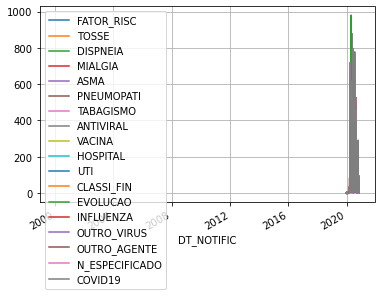

In [18]:
offset.plot(grid=True).get_figure().savefig('offsetDia.png')

In [19]:
offsetMes = pd.DataFrame(index=data2020Mes.index, columns=data2020Mes.columns[1:])
offsetMes = (data2020Mes[data2020Mes.columns[1:]] - data2019Mes[data2019Mes.columns[1:]])/data2019Mes[data2019Mes.columns[1:]]
offsetMes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TOSSE           11 non-null     float64
 1   DISPNEIA        11 non-null     float64
 2   MIALGIA         11 non-null     float64
 3   ASMA            11 non-null     float64
 4   PNEUMOPATI      11 non-null     float64
 5   TABAGISMO       11 non-null     float64
 6   ANTIVIRAL       11 non-null     float64
 7   VACINA          11 non-null     float64
 8   HOSPITAL        11 non-null     float64
 9   UTI             11 non-null     float64
 10  CLASSI_FIN      11 non-null     float64
 11  INFLUENZA       11 non-null     float64
 12  OUTRO_VIRUS     11 non-null     float64
 13  OUTRO_AGENTE    11 non-null     float64
 14  N_ESPECIFICADO  11 non-null     float64
 15  COVID19         9 non-null      float64
dtypes: float64(16)
memory usage: 1.6 KB


In [20]:
offsetMes.plot(grid=True)

<AxesSubplot:xlabel='DT_NOTIFIC'>

DT_NOTIFIC                                  ID_UNIDADE  NU_IDADE_N  \
3642   2020-01-01          HOSPITAL ISRAELITA ALBERT EINSTEIN           1   
3643   2020-01-02                  HOSP E MATERNIDADE DO BRAZ          45   
3644   2020-01-02             HOSPITAL REGIONAL SUL SAO PAULO          11   
3645   2020-01-02                        HOSP MUN M BOI MIRIM           7   
3646   2020-01-02  HOSP MUN JABAQUARA ARTUR RIBEIRO DE SABOYA           7   
...           ...                                         ...         ...   
122665 2020-11-16                                  HOSP IGESP          79   
122668 2020-11-16          HOSPITAL SANTA MARCELINA SAO PAULO          79   
122669 2020-11-16                                 HOSPITAL BP          85   
122673 2020-11-16          HOSPITAL SANTA MARCELINA SAO PAULO          58   
122675 2020-11-16                         HOSPITAL SAMARITANO          13   

         CS_RACA FATOR_RISC  TOSSE  DISPNEIA  MIALGIA  ASMA  PNEUMOPATI  ...  \
3642      BRANCA          N    1.0       0.0        0   NaN         NaN  ...   
3643    IGNORADO          S    1.0       1.0        0   NaN         NaN  ...   
3644       PARDA          N    1.0       1.0        0   NaN         NaN  ...   
3645       PARDA          S    1.0       1.0        0   2.0         1.0  ...   
3646        None          N    1.0       1.0        0   NaN         NaN  ...   
...          ...        ...    ...       ...      ...   ...         ...  ...   
122665  IGNORADO          S    1.0       0.0        0   2.0         0.0  ...   
122668     PARDA          S    0.0       0.0        0   NaN         NaN  ...   
122669     PARDA          S    9.0       9.0        0   2.0         0.0  ...   
122673    BRANCA          S    NaN       NaN        0   NaN         NaN  ...   
122675    BRANCA          S    NaN       NaN        0   NaN         NaN  ...   

        VACINA  HOSPITAL  UTI  CLASSI_FIN  EVOLUCAO  INFLUENZA OUTRO_VIRUS  \
3642       NaN       0.0  NaN         2.0      CURA        0.0         1.0   
3643       9.0       1.0  1.0         4.0     OBITO        0.0         0.0   
3644       1.0       1.0  1.0         4.0      CURA        0.0         0.0   
3645       0.0       1.0  1.0         1.0      CURA        1.0         0.0   
3646       0.0       1.0  0.0         1.0      CURA        1.0         0.0   
...        ...       ...  ...         ...       ...        ...         ...   
122665     9.0       1.0  0.0         5.0      CURA        0.0         0.0   
122668     0.0       1.0  0.0         5.0      CURA        0.0         0.0   
122669     9.0       1.0  1.0         5.0      CURA        0.0         0.0   
122673     0.0       1.0  0.0         5.0      CURA        0.0         0.0   
122675     9.0       1.0  0.0         5.0       NaN        0.0         0.0   

        OUTRO_AGENTE  N_ESPECIFICADO  COVID19  
3642             0.0             0.0      0.0  
3643             0.0             1.0      0.0  
3644             0.0             1.0      0.0  
3645             0.0             0.0      0.0  
3646             0.0             0.0      0.0  
...              ...             ...      ...  
122665           0.0             0.0      1.0  
122668           0.0             0.0      1.0  
122669           0.0             0.0      1.0  
122673           0.0             0.0      1.0  
122675           0.0             0.0      1.0  

[110380 rows x 22 columns]

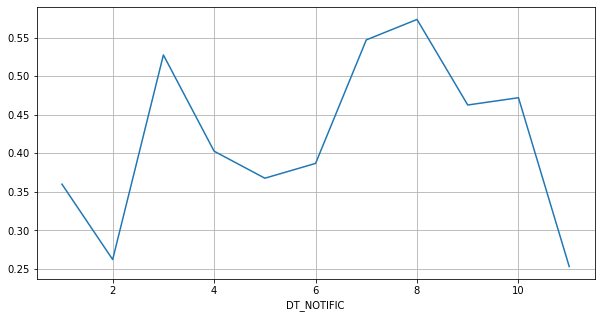

In [21]:
meanDados = data_saud_compacta[data_saud_compacta['DT_NOTIFIC'].dt.year == 2020]
meanDadosDia = meanDados.groupby(meanDados['DT_NOTIFIC'].dt.date).mean()
meanDadosMes = meanDados.groupby(meanDados['DT_NOTIFIC'].dt.month).mean()
meanDadosMes['PNEUMOPATI'].plot(figsize=(10,5), grid=True)
meanDados

In [22]:
meanDadosDia[meanDadosDia.columns[0:]].corr().style.background_gradient(cmap='RdBu')

# Sintomas e suas correlações

In [23]:
data_sintomas = data_saud[['DT_NOTIFIC','FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA','MIALGIA','CEFALEIA','CORIZA']]

In [24]:
data_sintomas.DT_NOTIFIC = pd.to_datetime(data_sintomas.DT_NOTIFIC, infer_datetime_format=True)
data_sintomas2019 = data_sintomas.loc[data_sintomas.DT_NOTIFIC.dt.year == 2019]
data_sintomas2020 = data_sintomas.loc[data_sintomas.DT_NOTIFIC.dt.year == 2020]
data_sintomas2020['DT_NOTIFIC'] = data_sintomas2020['DT_NOTIFIC'] - pd.DateOffset(years=1)

C:\Users\User\anaconda3\envs\DataScience\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-24-bf551d8f7ef3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sintomas2020['DT_NOTIFIC'] = data_sintomas2020['DT_NOTIFIC'] - pd.DateOffset(years=1)


In [25]:
data_sintomas2019Dia = data_sintomas2019.groupby(data_sintomas2019.DT_NOTIFIC.dt.date).count()
data_sintomas2020Dia = data_sintomas2020.groupby(data_sintomas2020.DT_NOTIFIC.dt.date).count()

data_sintomas2019Dia.drop('DT_NOTIFIC', axis='columns',inplace=True)
data_sintomas2020Dia.drop('DT_NOTIFIC', axis='columns',inplace=True)

data2019Dia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 2019-01-02 to 2019-12-31
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_UNIDADE      307 non-null    int64  
 1   NU_IDADE_N      307 non-null    float64
 2   CS_RACA         307 non-null    int64  
 3   FATOR_RISC      307 non-null    int64  
 4   TOSSE           307 non-null    int64  
 5   DISPNEIA        307 non-null    int64  
 6   MIALGIA         307 non-null    int64  
 7   ASMA            307 non-null    int64  
 8   PNEUMOPATI      307 non-null    int64  
 9   TABAGISMO       307 non-null    int64  
 10  ANTIVIRAL       307 non-null    int64  
 11  VACINA          307 non-null    int64  
 12  HOSPITAL        307 non-null    int64  
 13  UTI             307 non-null    int64  
 14  CLASSI_FIN      307 non-null    int64  
 15  EVOLUCAO        307 non-null    int64  
 16  INFLUENZA       307 non-null    int64  
 17  OUTRO_VIRUS     307 non-

In [26]:
data_sintomas2019Mes = data_sintomas2019.groupby(data_sintomas2019.DT_NOTIFIC.dt.month).sum()
data_sintomas2020Mes = data_sintomas2020.groupby(data_sintomas2020.DT_NOTIFIC.dt.month).sum()
data_sintomas2019Mes

FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  DIARREIA  \
DT_NOTIFIC                                                                     
1           127.0  125.0     105.0     102.0      130.0      132.0      74.0   
2           159.0  155.0     163.0     122.0      181.0      153.0     135.0   
3           331.0  307.0     266.0     287.0      358.0      315.0     204.0   
4           338.0  355.0     333.0     324.0      337.0      348.0     286.0   
5           574.0  611.0     504.0     528.0      585.0      570.0     409.0   
6           536.0  549.0     577.0     490.0      539.0      501.0     373.0   
7           315.0  317.0     174.0     263.0      291.0      296.0     204.0   
8           204.0  228.0     200.0     186.0      225.0      208.0     131.0   
9           184.0  183.0     184.0     173.0      174.0      214.0     182.0   
10          260.0  279.0     228.0     221.0      267.0      253.0     200.0   
11          221.0  210.0     179.0     181.0      234.0      223.0     152.0   
12          227.0  231.0     208.0     183.0      210.0      200.0     218.0   

            VOMITO  DOR_ABD  FADIGA  PERD_OLFT  PERD_PALA  MIALGIA  CEFALEIA  \
DT_NOTIFIC                                                                     
1             93.0      0.0     0.0        0.0        0.0        4         3   
2            127.0      0.0     0.0        0.0        0.0        8         8   
3            268.0      0.0     0.0        0.0        0.0       11         7   
4            324.0      0.0     0.0        0.0        0.0       13         9   
5            467.0      0.0     0.0        0.0        0.0       31        19   
6            356.0      0.0     0.0        0.0        0.0       19        11   
7            235.0      0.0     0.0        0.0        0.0       10         6   
8            135.0      0.0     0.0        0.0        0.0        7        10   
9            223.0      0.0     0.0        0.0        0.0       11         3   
10           226.0      0.0     0.0        0.0        0.0       15         4   
11           170.0      0.0     0.0        0.0        0.0        5         1   
12           225.0      0.0     0.0        0.0        0.0        8         5   

            CORIZA  
DT_NOTIFIC          
1                5  
2               11  
3               17  
4               26  
5               40  
6               42  
7               26  
8               10  
9               13  
10              26  
11              11  
12              21

In [27]:
offset2 = pd.DataFrame(index=data_sintomas2020Dia.index, columns=data_sintomas2020Dia.columns[0:])
offset2 = (data_sintomas2020Dia[data_sintomas2020Dia.columns[0:]] - data_sintomas2019Dia[data_sintomas2019Dia.columns[0:]])/data_sintomas2019Dia[data_sintomas2019Dia.columns[0:]]
offset2.index = pd.to_datetime(offset2.index)
offset2.index = offset2.index + pd.DateOffset(years=1)
offset2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 354 entries, 2020-01-01 to 2020-12-31
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FEBRE      266 non-null    float64
 1   TOSSE      266 non-null    float64
 2   GARGANTA   266 non-null    float64
 3   DISPNEIA   266 non-null    float64
 4   DESC_RESP  266 non-null    float64
 5   SATURACAO  266 non-null    float64
 6   DIARREIA   266 non-null    float64
 7   VOMITO     266 non-null    float64
 8   DOR_ABD    220 non-null    float64
 9   FADIGA     218 non-null    float64
 10  PERD_OLFT  218 non-null    float64
 11  PERD_PALA  218 non-null    float64
 12  MIALGIA    266 non-null    float64
 13  CEFALEIA   266 non-null    float64
 14  CORIZA     266 non-null    float64
dtypes: float64(15)
memory usage: 44.2 KB


In [28]:
offset2.plot(grid=True).get_figure().savefig('offsetSintomaDia.png')

In [29]:
offsetMes2 = pd.DataFrame(index=data_sintomas2020Mes.index, columns=data_sintomas2020Mes.columns[0:])
offsetMes2 = (data_sintomas2020Mes[data_sintomas2020Mes.columns[1:]] - data_sintomas2019Mes[data_sintomas2019Mes.columns[0:]])/data_sintomas2019Mes[data_sintomas2019Mes.columns[1:]]
offsetMes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CEFALEIA   11 non-null     float64
 1   CORIZA     11 non-null     float64
 2   DESC_RESP  11 non-null     float64
 3   DIARREIA   11 non-null     float64
 4   DISPNEIA   11 non-null     float64
 5   DOR_ABD    9 non-null      float64
 6   FADIGA     10 non-null     float64
 7   FEBRE      0 non-null      float64
 8   GARGANTA   11 non-null     float64
 9   MIALGIA    11 non-null     float64
 10  PERD_OLFT  10 non-null     float64
 11  PERD_PALA  10 non-null     float64
 12  SATURACAO  11 non-null     float64
 13  TOSSE      11 non-null     float64
 14  VOMITO     11 non-null     float64
dtypes: float64(15)
memory usage: 1.5 KB


<AxesSubplot:xlabel='DT_NOTIFIC'>

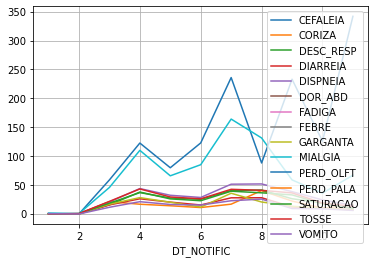

In [30]:
offsetMes2.plot(grid=True)

DT_NOTIFIC  FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  \
3642   2020-01-01    1.0    1.0       1.0       0.0        NaN        NaN   
3643   2020-01-02    1.0    1.0       0.0       1.0        1.0        1.0   
3644   2020-01-02    1.0    1.0       0.0       1.0        1.0        1.0   
3645   2020-01-02    0.0    1.0       0.0       1.0        1.0        1.0   
3646   2020-01-02    1.0    1.0       9.0       1.0        1.0        0.0   
...           ...    ...    ...       ...       ...        ...        ...   
122671 2020-11-16    NaN    1.0       NaN       1.0        1.0        1.0   
122672 2020-11-16    0.0    1.0       1.0       1.0        0.0        1.0   
122673 2020-11-16    NaN    NaN       NaN       NaN        NaN        NaN   
122674 2020-11-16    NaN    1.0       NaN       1.0        NaN        1.0   
122675 2020-11-16    NaN    NaN       NaN       NaN        NaN        NaN   

        DIARREIA  VOMITO  DOR_ABD  FADIGA  PERD_OLFT  PERD_PALA  MIALGIA  \
3642         NaN     NaN      NaN     NaN        NaN        NaN        0   
3643         0.0     0.0      NaN     NaN        NaN        NaN        0   
3644         0.0     0.0      NaN     NaN        NaN        NaN        0   
3645         0.0     0.0      NaN     NaN        NaN        NaN        0   
3646         0.0     0.0      NaN     NaN        NaN        NaN        0   
...          ...     ...      ...     ...        ...        ...      ...   
122671       NaN     NaN      NaN     1.0        NaN        NaN        0   
122672       0.0     0.0      0.0     0.0        0.0        0.0        0   
122673       NaN     NaN      NaN     NaN        NaN        NaN        0   
122674       NaN     NaN      NaN     NaN        NaN        NaN        0   
122675       NaN     NaN      NaN     NaN        NaN        NaN        0   

        CEFALEIA  CORIZA  
3642           0       0  
3643           0       0  
3644           0       0  
3645           0       0  
3646           0       0  
...          ...     ...  
122671         0       0  
122672         0       0  
122673         0       0  
122674         0       0  
122675         0       1  

[119034 rows x 16 columns]

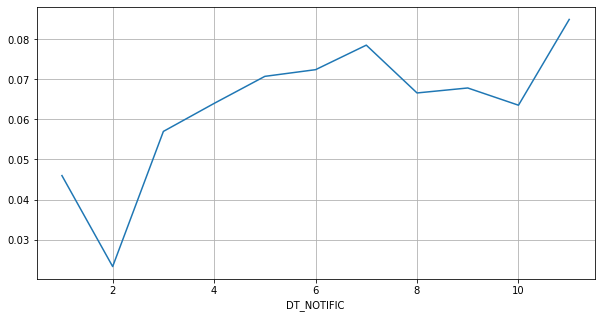

In [31]:
meanDadosSint = data_sintomas[data_sintomas['DT_NOTIFIC'].dt.year == 2020]
meanDadosDiaSint = meanDadosSint.groupby(meanDadosSint['DT_NOTIFIC'].dt.date).mean()
meanDadosMesSint = meanDadosSint.groupby(meanDadosSint['DT_NOTIFIC'].dt.month).mean()
meanDadosMesSint['CEFALEIA'].plot(figsize=(10,5), grid=True)
meanDadosSint

In [32]:
meanDadosDiaSint[meanDadosDiaSint.columns[0:]].corr().style.background_gradient(cmap='RdBu')

## Análise por bairro

In [33]:
hospitais = pd.read_csv('./data/Unidades_geo_info.csv', index_col=0)
hospitais.head()

Bairro      CEP                                    Hospitais  \
0  Cerqueira César  5403010  HC DA FMUSP HOSPITAL DAS CLINICAS SAO PAULO   
1          Paraíso  4004030                          HOSPITAL DO CORACAO   
2   Vila Campestre  4330902   HOSP MUN JABAQUARA ARTUR RIBEIRO DE SABOYA   
3   Vila Carmosina  8270070           HOSPITAL SANTA MARCELINA SAO PAULO   
4     Indianópolis  4028001                      HOSPITAL ALVORADA MOEMA   

    Latitude  Longitude  
0 -23.557396 -46.671470  
1 -23.575647 -46.642660  
2        NaN        NaN  
3        NaN        NaN  
4 -23.610781 -46.669081

In [34]:
data_saud_compacta[['INFLUENZA', 'OUTRO_VIRUS', 'OUTRO_AGENTE', 'N_ESPECIFICADO', 'COVID19']] = data_saud_compacta[['INFLUENZA', 'OUTRO_VIRUS', 'OUTRO_AGENTE', 'N_ESPECIFICADO', 'COVID19']].apply(pd.to_numeric)

In [35]:
data_saud_compacta.head()

DT_NOTIFIC                          ID_UNIDADE  NU_IDADE_N   CS_RACA  \
0 2019-01-02            HOSPITAL BOSQUE DA SAUDE          27    BRANCA   
1 2019-01-02                     HOSP 9 DE JULHO           1    BRANCA   
2 2019-01-02            BP HOSPITAL FILANTROPICO          59    BRANCA   
3 2019-01-02  HOSPITAL ISRAELITA ALBERT EINSTEIN           1  IGNORADO   
4 2019-01-02  HOSPITAL ISRAELITA ALBERT EINSTEIN           1    BRANCA   

  FATOR_RISC  TOSSE  DISPNEIA  MIALGIA  ASMA  PNEUMOPATI  ...  VACINA  \
0        NaN    0.0       1.0        0   0.0         NaN  ...     0.0   
1        NaN    1.0       1.0        0   0.0         0.0  ...     9.0   
2        NaN    1.0       0.0        0   0.0         NaN  ...     0.0   
3        NaN    1.0       0.0        0   0.0         NaN  ...     9.0   
4        NaN    1.0       0.0        0   0.0         NaN  ...     9.0   

   HOSPITAL  UTI  CLASSI_FIN  EVOLUCAO  INFLUENZA OUTRO_VIRUS  OUTRO_AGENTE  \
0       1.0  1.0         4.0     OBITO        0.0         0.0           0.0   
1       1.0  1.0         2.0       NaN        0.0         1.0           0.0   
2       1.0  0.0         1.0      CURA        1.0         0.0           0.0   
3       1.0  1.0         2.0      CURA        0.0         1.0           0.0   
4       1.0  0.0         2.0      CURA        0.0         1.0           0.0   

   N_ESPECIFICADO  COVID19  
0             1.0      0.0  
1             0.0      0.0  
2             0.0      0.0  
3             0.0      0.0  
4             0.0      0.0  

[5 rows x 22 columns]

In [36]:
data_saud_compacta = pd.merge(data_saud_compacta,hospitais[['Hospitais', 'Bairro']], left_on='ID_UNIDADE', right_on='Hospitais')
data_saud_compacta.drop(['Hospitais'],axis=1, inplace=True)

In [37]:
data_saud_compacta.to_csv('./data/2020-12-05-dataComBairro.csv', index=False)

#### Influenza

In [38]:
influenza = data_saud_compacta[data_saud_compacta['INFLUENZA'] == 1.0]
influenza = influenza[['DT_NOTIFIC', 'Bairro', 'INFLUENZA', 'EVOLUCAO']]
influenza.head()

DT_NOTIFIC           Bairro  INFLUENZA  EVOLUCAO
5   2019-03-26            Saúde        1.0      CURA
407 2020-06-12            Saúde        1.0      CURA
483 2020-09-21            Saúde        1.0  IGNORADO
490 2019-01-07  Jardim Paulista        1.0      CURA
491 2019-01-07  Jardim Paulista        1.0     OBITO

<AxesSubplot:xlabel='Bairro'>

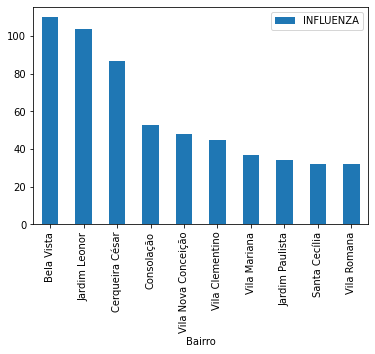

In [39]:
influenza[['Bairro', 'INFLUENZA']].groupby(['Bairro']).sum().sort_values('INFLUENZA', ascending=False).head(10).plot(kind='bar')

In [40]:
TopBairrosInflu = influenza[['Bairro', 'INFLUENZA']].groupby(['Bairro']).sum().sort_values('INFLUENZA', ascending=False).head(5).index

<AxesSubplot:xlabel='DT_NOTIFIC,DT_NOTIFIC'>

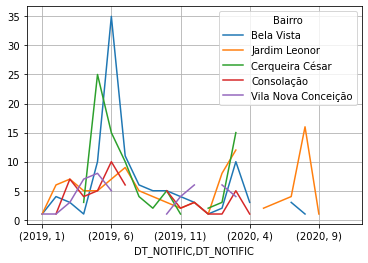

In [41]:
influTime = influenza[['Bairro', 'INFLUENZA', 'DT_NOTIFIC']].groupby([influenza.DT_NOTIFIC.dt.year, influenza.DT_NOTIFIC.dt.month, 'Bairro']).sum().squeeze().unstack()
influTime[TopBairrosInflu].plot(grid=True)

<AxesSubplot:xlabel='DT_NOTIFIC,DT_NOTIFIC'>

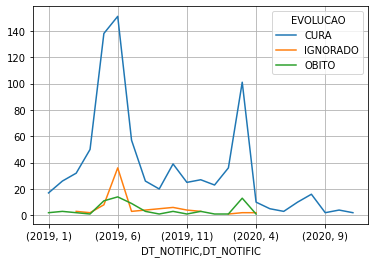

In [42]:
influenza[['Bairro', 'INFLUENZA', 'DT_NOTIFIC', 'EVOLUCAO']].groupby([influenza.DT_NOTIFIC.dt.year, influenza.DT_NOTIFIC.dt.month, 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

#### Outro vírus

In [43]:
outro_v = data_saud_compacta[data_saud_compacta['OUTRO_VIRUS'] == 1.0]
outro_v = outro_v[['DT_NOTIFIC', 'Bairro', 'OUTRO_VIRUS', 'EVOLUCAO']]

<AxesSubplot:xlabel='Bairro'>

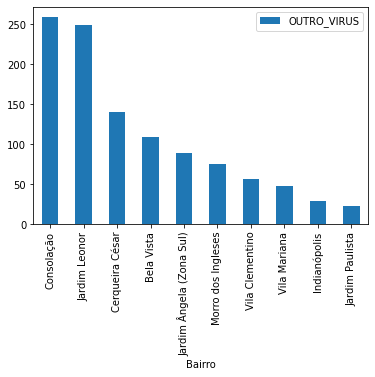

In [44]:
outro_v[['Bairro', 'OUTRO_VIRUS']].groupby(['Bairro']).sum().sort_values('OUTRO_VIRUS', ascending=False).head(10).plot(kind='bar')

In [45]:
TopBairrosV = outro_v[['Bairro', 'OUTRO_VIRUS']].groupby(['Bairro']).sum().sort_values('OUTRO_VIRUS', ascending=False).head(5).index

<AxesSubplot:xlabel='DT_NOTIFIC,DT_NOTIFIC'>

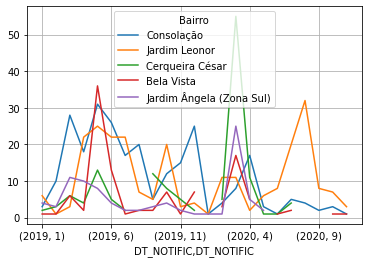

In [46]:
VirusTime = outro_v[['Bairro', 'OUTRO_VIRUS', 'DT_NOTIFIC']].groupby([outro_v.DT_NOTIFIC.dt.year, outro_v.DT_NOTIFIC.dt.month, 'Bairro']).sum().squeeze().unstack()
VirusTime[TopBairrosV].plot(grid=True)

<AxesSubplot:xlabel='DT_NOTIFIC,DT_NOTIFIC'>

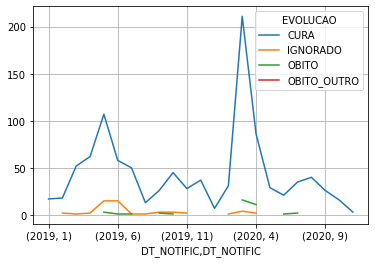

In [47]:
outro_v[['Bairro', 'OUTRO_VIRUS', 'DT_NOTIFIC', 'EVOLUCAO']].groupby([outro_v.DT_NOTIFIC.dt.year, outro_v.DT_NOTIFIC.dt.month, 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

#### Outro agente

In [48]:
outro_a = data_saud_compacta[data_saud_compacta['OUTRO_AGENTE'] == 1.0]
outro_a = outro_a[['DT_NOTIFIC', 'Bairro', 'OUTRO_AGENTE', 'EVOLUCAO']]

<AxesSubplot:xlabel='Bairro'>

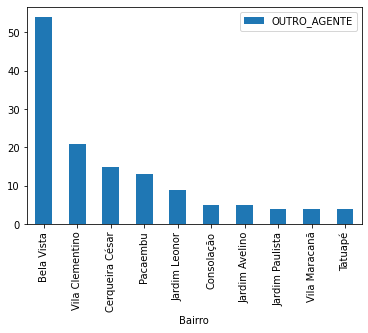

In [49]:
outro_a[['Bairro', 'OUTRO_AGENTE']].groupby(['Bairro']).sum().sort_values('OUTRO_AGENTE', ascending=False).head(10).plot(kind='bar')

In [50]:
TopBairrosA = outro_a[['Bairro', 'OUTRO_AGENTE']].groupby(['Bairro']).sum().sort_values('OUTRO_AGENTE', ascending=False).head(5).index

<AxesSubplot:xlabel='DT_NOTIFIC,DT_NOTIFIC'>

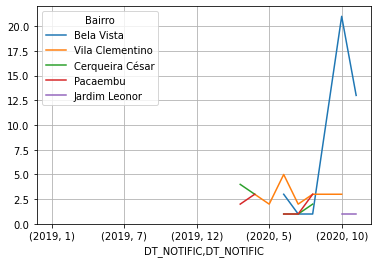

In [51]:
agenteTime = outro_a[['Bairro', 'OUTRO_AGENTE', 'DT_NOTIFIC']].groupby([outro_a.DT_NOTIFIC.dt.year, outro_a.DT_NOTIFIC.dt.month, 'Bairro']).sum().squeeze().unstack()
agenteTime[TopBairrosA].plot(grid=True)

<AxesSubplot:xlabel='DT_NOTIFIC,DT_NOTIFIC'>

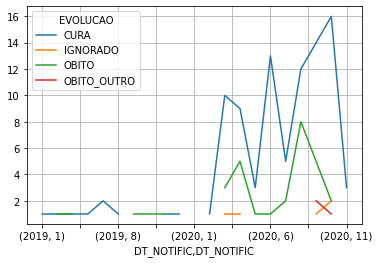

In [52]:
outro_a[['Bairro', 'OUTRO_AGENTE', 'DT_NOTIFIC', 'EVOLUCAO']].groupby([outro_a.DT_NOTIFIC.dt.year, outro_a.DT_NOTIFIC.dt.month, 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

#### Não especificado

In [53]:
n_espec = data_saud_compacta[data_saud_compacta['N_ESPECIFICADO'] == 1.0]
n_espec = n_espec[['DT_NOTIFIC', 'Bairro', 'N_ESPECIFICADO', 'EVOLUCAO']]

<AxesSubplot:xlabel='Bairro'>

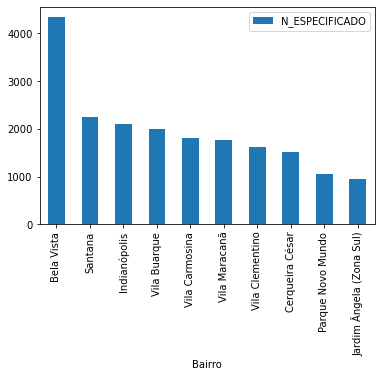

In [54]:
n_espec[['Bairro', 'N_ESPECIFICADO']].groupby(['Bairro']).sum().sort_values('N_ESPECIFICADO', ascending=False).head(10).plot(kind='bar')

In [55]:
TopBairrosDesc = n_espec[['Bairro', 'N_ESPECIFICADO']].groupby(['Bairro']).sum().sort_values('N_ESPECIFICADO', ascending=False).head(5).index

<AxesSubplot:xlabel='DT_NOTIFIC,DT_NOTIFIC'>

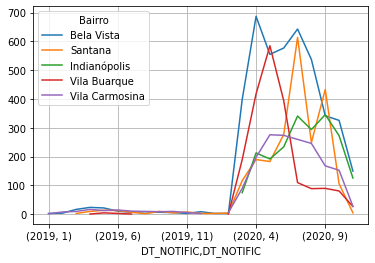

In [56]:
n_especTime = n_espec[['Bairro', 'N_ESPECIFICADO', 'DT_NOTIFIC']].groupby([n_espec.DT_NOTIFIC.dt.year, n_espec.DT_NOTIFIC.dt.month, 'Bairro']).sum().squeeze().unstack()
n_especTime[TopBairrosDesc].plot(grid=True)

<AxesSubplot:xlabel='DT_NOTIFIC,DT_NOTIFIC'>

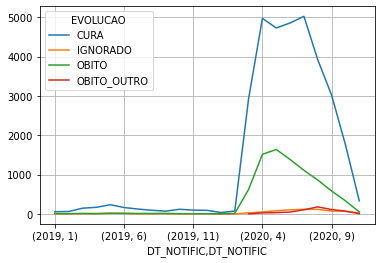

In [57]:
n_espec[['Bairro', 'N_ESPECIFICADO', 'DT_NOTIFIC', 'EVOLUCAO']].groupby([n_espec.DT_NOTIFIC.dt.year, n_espec.DT_NOTIFIC.dt.month, 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

#### Covid

In [58]:
covid = data_saud_compacta[(data_saud_compacta['COVID19'] == 1.0) & (data_saud_compacta['DT_NOTIFIC'].dt.year == 2020)]
covid = covid[['DT_NOTIFIC', 'Bairro', 'COVID19', 'EVOLUCAO']]

<AxesSubplot:xlabel='Bairro'>

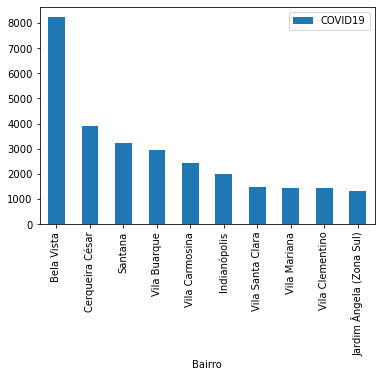

In [59]:
covid[['Bairro', 'COVID19']].groupby(['Bairro']).sum().sort_values('COVID19', ascending=False).head(10).plot(kind='bar')

In [60]:
TopBairrosCovid = covid[['Bairro', 'COVID19']].groupby(['Bairro']).sum().sort_values('COVID19', ascending=False).head(5).index

<AxesSubplot:xlabel='DT_NOTIFIC'>

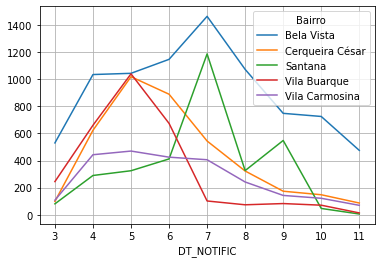

In [61]:
covidTime = covid[['Bairro', 'COVID19', 'DT_NOTIFIC']].groupby([covid.DT_NOTIFIC.dt.month, 'Bairro']).sum().squeeze().unstack()
covidTime[TopBairrosCovid].plot(grid=True)

<AxesSubplot:xlabel='DT_NOTIFIC'>

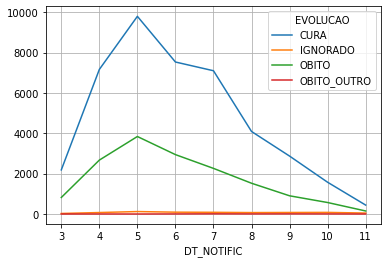

In [62]:
covid[['Bairro', 'COVID19', 'DT_NOTIFIC', 'EVOLUCAO']].groupby([covid.DT_NOTIFIC.dt.month, 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

# Faixa Etária por Bairro

### Influenza

In [63]:
data_saud_idade = data_saud_compacta[data_saud_compacta['NU_IDADE_N'].notna()]

In [64]:
influIdade = data_saud_idade[data_saud_compacta['INFLUENZA'] == 1.0]
influIdade = influIdade[['DT_NOTIFIC','Bairro','NU_IDADE_N','INFLUENZA','EVOLUCAO']]

In [65]:
influIdade['Dezenas'] = np.floor(influIdade.NU_IDADE_N/10)
influIdade

DT_NOTIFIC                  Bairro  NU_IDADE_N  INFLUENZA  EVOLUCAO  \
5      2019-03-26                   Saúde          63        1.0      CURA   
407    2020-06-12                   Saúde          34        1.0      CURA   
483    2020-09-21                   Saúde          94        1.0  IGNORADO   
490    2019-01-07         Jardim Paulista          75        1.0      CURA   
491    2019-01-07         Jardim Paulista           1        1.0     OBITO   
...           ...                     ...         ...        ...       ...   
98280  2020-03-20              Bela Vista          95        1.0     OBITO   
105450 2020-11-11              Bela Vista          65        1.0      CURA   
106191 2020-03-31              Bela Vista          33        1.0      CURA   
107341 2020-09-17  Jardim Cidade Pirituba          41        1.0      CURA   
108250 2020-05-27         Vila Morgadouro          31        1.0      CURA   

        Dezenas  
5           6.0  
407         3.0  
483         9.0  
490         7.0  
491         0.0  
...         ...  
98280       9.0  
105450      6.0  
106191      3.0  
107341      4.0  
108250      3.0  

[1065 rows x 6 columns]

<AxesSubplot:xlabel='Dezenas'>

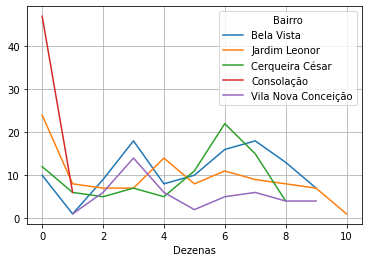

In [66]:
influIdTime = influIdade[['Bairro', 'INFLUENZA','Dezenas']].groupby([ 'Dezenas','Bairro']).sum().squeeze().unstack()
influIdTime[TopBairrosInflu].plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

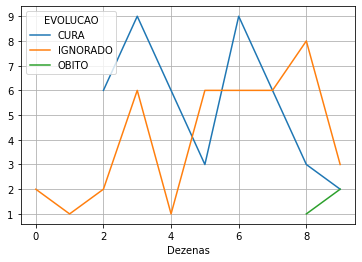

In [67]:
influIdadeBelaVista = influIdade[influIdade['Bairro']=='Bela Vista']
influIdadeBelaVista[['Bairro', 'INFLUENZA', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

In [68]:
influIdadeJardimLeonor = influIdade[influIdade['Bairro']=='Jardim Leonor']
influIdadeJardimLeonor[['Bairro', 'INFLUENZA', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

<AxesSubplot:xlabel='Dezenas'>

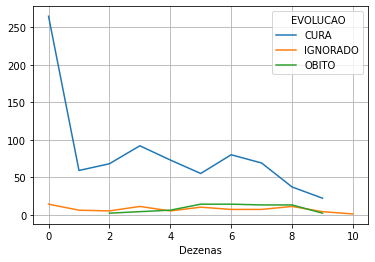

In [69]:
influIdade[['Bairro', 'INFLUENZA', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

### Outro vírus

In [70]:
outroVIdade = data_saud_idade[data_saud_compacta['OUTRO_VIRUS'] == 1.0]
outroVIdade = outroVIdade[['DT_NOTIFIC','Bairro','NU_IDADE_N','OUTRO_VIRUS','EVOLUCAO']]
outroVIdade['Dezenas'] = np.floor(outroVIdade.NU_IDADE_N/10)
outroVIdade

DT_NOTIFIC           Bairro  NU_IDADE_N  OUTRO_VIRUS EVOLUCAO  Dezenas
489    2019-01-02  Jardim Paulista           1          1.0      NaN      0.0
493    2019-01-07  Jardim Paulista          25          1.0      NaN      2.0
494    2019-01-30  Jardim Paulista          50          1.0     CURA      5.0
495    2019-02-14  Jardim Paulista          41          1.0      NaN      4.0
501    2019-04-07  Jardim Paulista          38          1.0     CURA      3.0
...           ...              ...         ...          ...      ...      ...
104731 2020-03-26       Bela Vista          73          1.0     CURA      7.0
104777 2020-04-03       Bela Vista          80          1.0     CURA      8.0
106609 2020-04-22        Liberdade          19          1.0    OBITO      1.0
106627 2020-05-16        Liberdade          43          1.0     CURA      4.0
106641 2020-06-01        Liberdade           9          1.0     CURA      0.0

[1255 rows x 6 columns]

In [71]:
outroVIdade.NU_IDADE_N.value_counts()

1     305
2     145
3      85
4      79
5      68
     ... 
87      1
88      1
90      1
93      1
45      1
Name: NU_IDADE_N, Length: 89, dtype: int64

In [72]:
outroVIdadeTime = outroVIdade[['Bairro', 'OUTRO_VIRUS','Dezenas']].groupby([ 'Dezenas','Bairro']).sum().squeeze().unstack()
outroVIdadeTime[TopBairrosV].plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

<AxesSubplot:xlabel='Dezenas'>

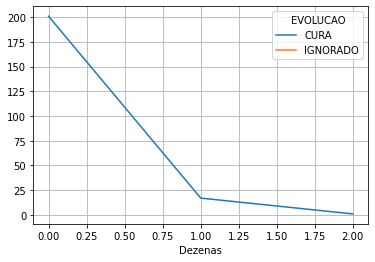

In [73]:
outroVIdadeConsolacao = outroVIdade[outroVIdade['Bairro']=='Consolação']
outroVIdadeConsolacao[['Bairro', 'OUTRO_VIRUS', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

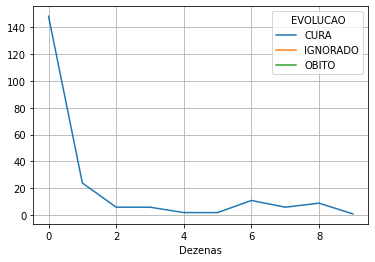

In [74]:
outroVIdadeJardimLeonor = outroVIdade[outroVIdade['Bairro']=='Jardim Leonor']
outroVIdadeJardimLeonor[['Bairro', 'OUTRO_VIRUS', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

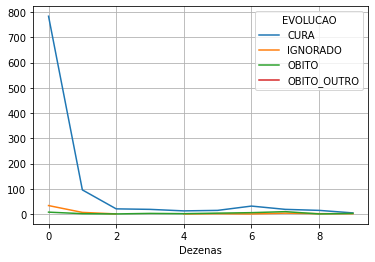

In [75]:
outroVIdade[['OUTRO_VIRUS', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

### Outro agente

In [76]:
outroAIdade = data_saud_idade[data_saud_compacta['OUTRO_AGENTE'] == 1.0]
outroAIdade = outroAIdade[['DT_NOTIFIC','Bairro','NU_IDADE_N','OUTRO_AGENTE','EVOLUCAO']]
outroAIdade['Dezenas'] = np.floor(outroAIdade.NU_IDADE_N/10)
outroAIdade

DT_NOTIFIC                  Bairro  NU_IDADE_N  OUTRO_AGENTE  \
1190   2020-09-14         Jardim Paulista          97           1.0   
1202   2020-09-17         Jardim Paulista          62           1.0   
1208   2020-09-17         Jardim Paulista          79           1.0   
1215   2020-09-21         Jardim Paulista          53           1.0   
1519   2020-02-21           Jardim Leonor           4           1.0   
...           ...                     ...         ...           ...   
104051 2020-10-08            Vila Azevedo           6           1.0   
104728 2020-03-26              Bela Vista          84           1.0   
105500 2020-04-27             Barra Funda          44           1.0   
113668 2020-09-01  Jardim Figueira Grande          39           1.0   
113670 2020-09-23  Jardim Figueira Grande          39           1.0   

           EVOLUCAO  Dezenas  
1190    OBITO_OUTRO      9.0  
1202    OBITO_OUTRO      6.0  
1208           CURA      7.0  
1215            NaN      5.0  
1519           CURA      0.0  
...             ...      ...  
104051     IGNORADO      0.0  
104728         CURA      8.0  
105500        OBITO      4.0  
113668        OBITO      3.0  
113670        OBITO      3.0  

[165 rows x 6 columns]

In [77]:
outroAIdadeTime = outroAIdade[['Bairro', 'OUTRO_AGENTE','Dezenas']].groupby([ 'Dezenas','Bairro']).sum().squeeze().unstack()
outroAIdadeTime[TopBairrosA].plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

<AxesSubplot:xlabel='Dezenas'>

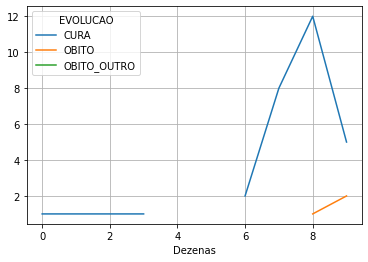

In [78]:
outroAIdadeBelaVista = outroAIdade[outroAIdade['Bairro']=='Bela Vista']
outroAIdadeBelaVista[['Bairro', 'OUTRO_AGENTE', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

In [79]:
outroAIdadeClementino = outroAIdade[outroAIdade['Bairro']=='Vila Clementino']
outroAIdadeClementino[['Bairro', 'OUTRO_AGENTE', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

<AxesSubplot:xlabel='Dezenas'>

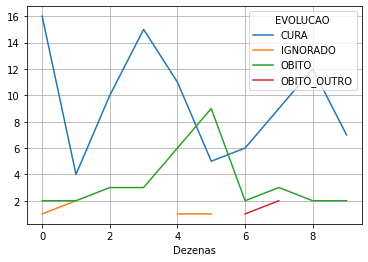

In [80]:
outroAIdade[['OUTRO_AGENTE', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

### COVID 19

In [81]:
CovidIdade = data_saud_idade[data_saud_compacta['COVID19'] == 1.0]
CovidIdade = CovidIdade[['DT_NOTIFIC','Bairro','NU_IDADE_N','COVID19','EVOLUCAO']]
CovidIdade['Dezenas'] = np.floor(CovidIdade.NU_IDADE_N/10)
CovidIdade

DT_NOTIFIC             Bairro  NU_IDADE_N  COVID19 EVOLUCAO  Dezenas
18     2020-03-18              Saúde          60      1.0    OBITO      6.0
20     2020-03-20              Saúde          50      1.0    OBITO      5.0
24     2020-03-22              Saúde          49      1.0     CURA      4.0
30     2020-03-24              Saúde          65      1.0     CURA      6.0
31     2020-03-25              Saúde          48      1.0     CURA      4.0
...           ...                ...         ...      ...      ...      ...
113798 2020-11-11        Jardim Peri          61      1.0      NaN      6.0
113799 2020-11-11        Jardim Peri          67      1.0    OBITO      6.0
113800 2020-08-19              Limão          67      1.0    OBITO      6.0
113801 2020-08-31         Bela Vista          81      1.0     CURA      8.0
113804 2020-09-15  Jardim Casablanca          64      1.0    OBITO      6.0

[64395 rows x 6 columns]

In [82]:
CovidIdadeTime = CovidIdade[['Bairro', 'COVID19','Dezenas']].groupby([ 'Dezenas','Bairro']).sum().squeeze().unstack()
CovidIdadeTime[TopBairrosCovid].plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

<AxesSubplot:xlabel='Dezenas'>

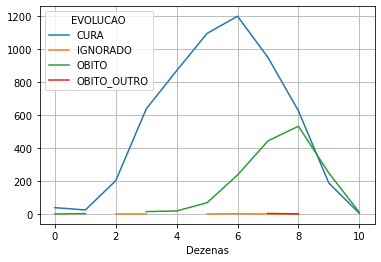

In [83]:
CovidIdadeBelaVista = CovidIdade[CovidIdade['Bairro']=='Bela Vista']
CovidIdadeBelaVista[['Bairro', 'COVID19', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

In [84]:
CovidIdadeCerqueira = CovidIdade[CovidIdade['Bairro']=='Cerqueira César']
CovidIdadeCerqueira[['Bairro', 'COVID19', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

In [85]:
CovidIdade[['COVID19', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

### Não Especificado

In [86]:
nEspIdade = data_saud_idade[data_saud_compacta['N_ESPECIFICADO'] == 1.0]
nEspIdade = nEspIdade[['DT_NOTIFIC','Bairro','NU_IDADE_N','N_ESPECIFICADO','EVOLUCAO']]
nEspIdade['Dezenas'] = np.floor(nEspIdade.NU_IDADE_N/10)
nEspIdade

DT_NOTIFIC                            Bairro  NU_IDADE_N  \
0      2019-01-02                             Saúde          27   
1      2019-02-11                             Saúde          40   
2      2019-02-18                             Saúde          26   
3      2019-03-14                             Saúde          23   
4      2019-03-23                             Saúde          22   
...           ...                               ...         ...   
113802 2020-09-01                   Vila Clementino          94   
113803 2020-09-07                           Tatuapé          62   
113805 2020-09-30  Chácara Santo Antônio (Zona Sul)          86   
113806 2020-10-01                    Parque do Lago          66   
113807 2020-10-17                   Penha de França          54   

        N_ESPECIFICADO EVOLUCAO  Dezenas  
0                  1.0    OBITO      2.0  
1                  1.0      NaN      4.0  
2                  1.0      NaN      2.0  
3                  1.0     CURA      2.0  
4                  1.0     CURA      2.0  
...                ...      ...      ...  
113802             1.0    OBITO      9.0  
113803             1.0     CURA      6.0  
113805             1.0    OBITO      8.0  
113806             1.0    OBITO      6.0  
113807             1.0    OBITO      5.0  

[46928 rows x 6 columns]

<AxesSubplot:xlabel='Dezenas'>

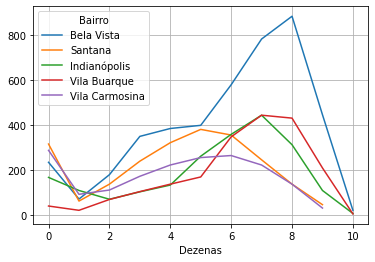

In [87]:
nEspIdadeTime = nEspIdade[['Bairro', 'N_ESPECIFICADO','Dezenas']].groupby([ 'Dezenas','Bairro']).sum().squeeze().unstack()
nEspIdadeTime[TopBairrosDesc].plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

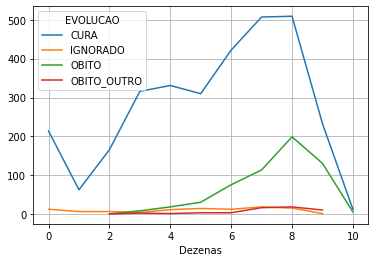

In [88]:
nEspIdadeBelaVista = nEspIdade[nEspIdade['Bairro']=='Bela Vista']
nEspIdadeBelaVista[['Bairro', 'N_ESPECIFICADO', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

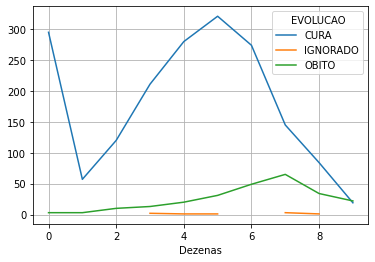

In [89]:
nEspIdadeSantana = nEspIdade[nEspIdade['Bairro']=='Santana']
nEspIdadeSantana[['Bairro', 'N_ESPECIFICADO', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

<AxesSubplot:xlabel='Dezenas'>

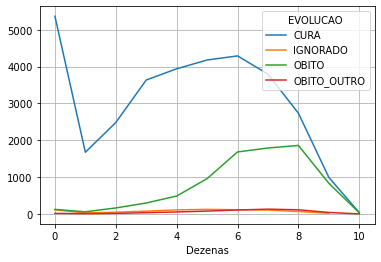

In [90]:
nEspIdade[['N_ESPECIFICADO', 'EVOLUCAO','Dezenas']].groupby(['Dezenas', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

In [91]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

In [92]:
saudPoints = gpd.read_file('./data/13_Saude.geojson')
cets = pd.read_csv('./data/CETESB_geo_info.csv')
distritos = gpd.read_file('./data/DEINFO_DISTRITO.shp')

In [93]:
cets.head()

Bairro                     Estação  Latitude  Longitude
0   Vila Monumento                     Cambuci   7392707     335456
1    Capão Redondo               Capão Redondo   7381358     318469
2       Consolação                      Centro   7394876     332354
3           Sumaré             Cerqueira César   7394205     329269
4          Butantã  Cid.Universitária-USP-Ipen   7392709     322680

In [94]:
distritos.head()

CLASSID     FEATID  REVISIONNU       NOME_DIST SIGLA_DIST COD_DIST COD_SUB  \
0      4.0  8583485.0         1.0  JOSE BONIFACIO        JBO       47      27   
1      4.0  8583484.0         1.0     JD SAO LUIS        JDS       46      18   
2      4.0  8583445.0         1.0     ARTUR ALVIM        AAL        5      21   
3      4.0  8583479.0         1.0         JAGUARA        JAG       40      08   
4      4.0  8583437.0         1.0   VILA PRUDENTE        VPR       93      29   

   DATA_CRIAC  USUARIO_ID                                           geometry  
0  2007-03-19         0.0  POLYGON ((352436.869 7394174.148, 352450.740 7...  
1  2007-03-19         0.0  POLYGON ((320696.639 7383620.282, 320699.486 7...  
2  2007-03-19         0.0  POLYGON ((349461.276 7397764.525, 349461.935 7...  
3  2007-03-19         0.0  POLYGON ((320731.080 7400614.592, 320732.386 7...  
4  2007-03-19         0.0  POLYGON ((338651.039 7392203.484, 338654.034 7...

In [95]:
geometry = [Point(xy) for xy in zip(cets.Longitude, cets.Latitude)]
cets = cets.drop(['Longitude', 'Latitude'], axis=1)
cetesb = gpd.GeoDataFrame(cets, crs="EPSG:4326", geometry=geometry)

In [96]:
saudPoints = saudPoints.to_crs(distritos.crs)

In [97]:
saudPoints = saudPoints[saudPoints.apply(lambda x: x.geometry.coords[0][1] < 9095643, axis=1)]

<AxesSubplot:>

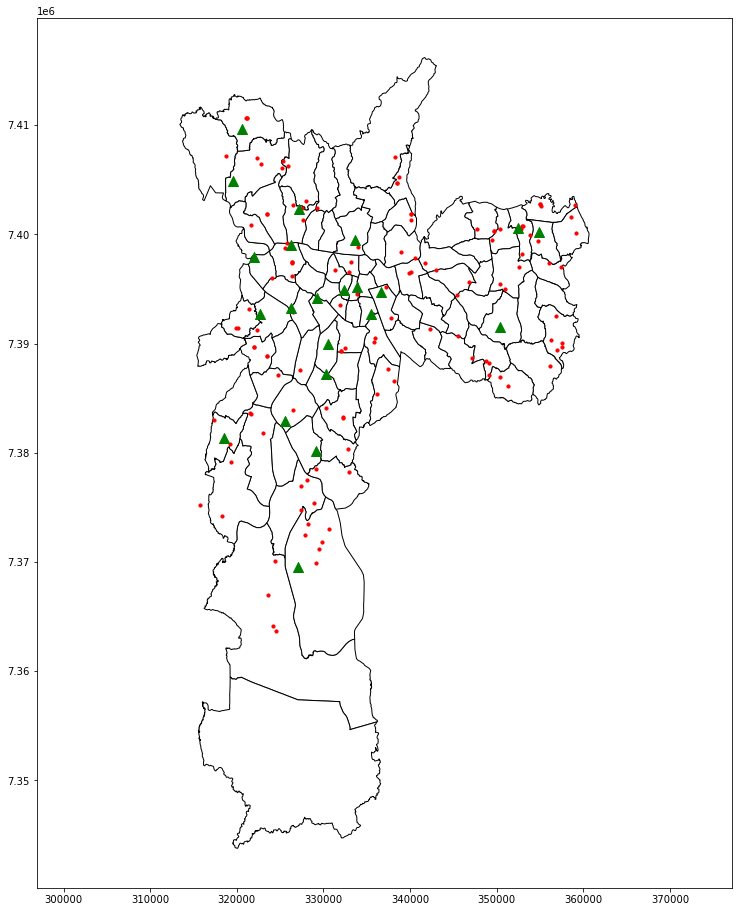

In [98]:
fig, ax = plt.subplots(figsize = (20,16)) 
ax.set_box_aspect(20/16)
distritos.plot(ax=ax, color='white', edgecolor='black')
saudPoints.plot(ax=ax, marker='o', color='red', markersize=10)
cetesb.plot(ax=ax, marker='^', color='green', markersize=100)

In [99]:
for index, row in distritos.iterrows():
    point = row.geometry.centroid
    print("point: ", point)
    multipoint = cetesb.unary_union
    queried_geom, nearest_geom = nearest_points(point, multipoint)
    print('nearest: ', nearest_geom)
    print('estação: ', cetesb.loc[cetesb.geometry == nearest_geom, 'Estação'].values[0])
    print('type: ', type(cetesb.loc[cetesb.geometry == nearest_geom, 'Estação'].values[0]))
    distritos.loc[index, 'EST_PROXIMA'] = cetesb.loc[cetesb.geometry == nearest_geom, 'Estação'].values[0]

point:  POINT (353834.2105195774 7392983.063370136)
nearest:  POINT (350334 7391504)
estação:  Itaquera
type:  <class 'str'>
point:  POINT (322676.391080996 7380084.927764957)
nearest:  POINT (325596 7382927)
estação:  Santo Amaro
type:  <class 'str'>
point:  POINT (348377.6523792436 7395944.38896559)
nearest:  POINT (350334 7391504)
estação:  Itaquera
type:  <class 'str'>
point:  POINT (321658.1585313983 7398867.736639335)
nearest:  POINT (322013 7397977)
estação:  Marg.Tietê-Pte Remédios
type:  <class 'str'>
point:  POINT (339562.0285494125 7390046.263530641)
nearest:  POINT (335456 7392707)
estação:  Cambuci
type:  <class 'str'>
point:  POINT (321541.6616236374 7395234.822928368)
nearest:  POINT (322680 7392709)
estação:  Cid.Universitária-USP-Ipen
type:  <class 'str'>
point:  POINT (322297.1220768681 7406088.225183301)
nearest:  POINT (319602 7404863)
estação:  Pico do Jaraguá
type:  <class 'str'>
point:  POINT (355740.7290752348 7402269.366430828)
nearest:  POINT (354934 7400240)


estação:  Santana
type:  <class 'str'>
point:  POINT (326522.402372554 7384379.266164014)
nearest:  POINT (325596 7382927)
estação:  Santo Amaro
type:  <class 'str'>
point:  POINT (321585.4624574704 7400823.500836177)
nearest:  POINT (322013 7397977)
estação:  Marg.Tietê-Pte Remédios
type:  <class 'str'>
point:  POINT (342545.2597472132 7389842.769334788)
nearest:  POINT (335456 7392707)
estação:  Cambuci
type:  <class 'str'>
point:  POINT (348913.0227725634 7389316.690680123)
nearest:  POINT (350334 7391504)
estação:  Itaquera
type:  <class 'str'>
point:  POINT (352929.5877879592 7400315.897816957)
nearest:  POINT (352473 7400550)
estação:  S.Miguel Paulista
type:  <class 'str'>
point:  POINT (351729.5355694809 7386225.895353447)
nearest:  POINT (350334 7391504)
estação:  Itaquera
type:  <class 'str'>
point:  POINT (346032.8079362258 7388674.591342899)
nearest:  POINT (350334 7391504)
estação:  Itaquera
type:  <class 'str'>
point:  POINT (332621.117079603 7387525.082464038)
nearest:  

In [100]:
distritos.head()

CLASSID     FEATID  REVISIONNU       NOME_DIST SIGLA_DIST COD_DIST COD_SUB  \
0      4.0  8583485.0         1.0  JOSE BONIFACIO        JBO       47      27   
1      4.0  8583484.0         1.0     JD SAO LUIS        JDS       46      18   
2      4.0  8583445.0         1.0     ARTUR ALVIM        AAL        5      21   
3      4.0  8583479.0         1.0         JAGUARA        JAG       40      08   
4      4.0  8583437.0         1.0   VILA PRUDENTE        VPR       93      29   

   DATA_CRIAC  USUARIO_ID                                           geometry  \
0  2007-03-19         0.0  POLYGON ((352436.869 7394174.148, 352450.740 7...   
1  2007-03-19         0.0  POLYGON ((320696.639 7383620.282, 320699.486 7...   
2  2007-03-19         0.0  POLYGON ((349461.276 7397764.525, 349461.935 7...   
3  2007-03-19         0.0  POLYGON ((320731.080 7400614.592, 320732.386 7...   
4  2007-03-19         0.0  POLYGON ((338651.039 7392203.484, 338654.034 7...   

               EST_PROXIMA  
0                 Itaquera  
1              Santo Amaro  
2                 Itaquera  
3  Marg.Tietê-Pte Remédios  
4                  Cambuci

<AxesSubplot:>

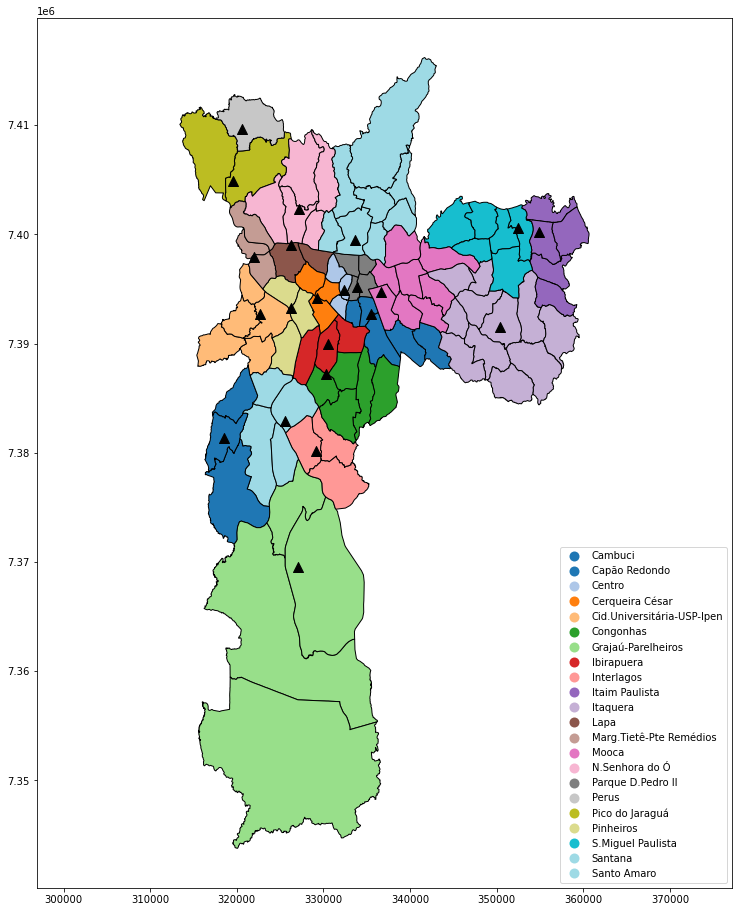

In [101]:
fig, ax = plt.subplots(figsize = (20,16)) 
ax.set_box_aspect(20/16)
distritos.plot(ax=ax, column='EST_PROXIMA', edgecolor='black', legend=True, cmap='tab20', legend_kwds={'loc':'lower right'})
cetesb.plot(ax=ax, marker='^', color='black', markersize=100)

In [102]:
est_para_dist = distritos[['NOME_DIST', 'EST_PROXIMA']]
est_para_dist.to_csv('./data/EstacaoPorDistrito.csv')